In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [26]:
x_train = np.random.random(100)

In [27]:
x_train.shape[0]

100

In [28]:
values = [10, 100, 1000, 10000]

In [29]:
w_org = np.random.random(1)[0]/random.choice(values)
b_org = np.random.random(1)[0]/random.choice(values)

In [30]:
y_train= w_org * x_train + b_org

In [31]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
        
    total_cost= 1/ (2*m) * cost
    return total_cost

In [32]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    df_dw = 0
    df_db = 0
    
    for i in range(m):
        f_wb = w* x[i] + b
        
        df_dw_i = (f_wb - y[i])* x[i]
        df_db_i = (f_wb - y[i])
        
        df_dw+= df_dw_i
        df_db+= df_db_i
        
    
    return df_dw/m , df_db/m 
        
    


In [33]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha* dj_dw
        b = b - alpha* dj_db
        
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history
            

In [34]:
w_init = 1.0
b_init = 1.0

iterations = 10000

tmp_alpha = 3.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")




Iteration    0: Cost 1.10e+00  dj_dw:  8.697e-01, dj_db:  1.515e+00   w:  9.739e-01, b: 9.54537e-01
Iteration 1000: Cost 8.83e-05  dj_dw:  3.030e-03, dj_db: -1.678e-03   w:  4.475e-02, b:-2.37770e-02
Iteration 2000: Cost 1.52e-06  dj_dw:  3.970e-04, dj_db: -2.199e-04   w:  5.921e-03, b:-2.27136e-03
Iteration 3000: Cost 2.60e-08  dj_dw:  5.201e-05, dj_db: -2.881e-05   w:  8.346e-04, b: 5.46267e-04
Iteration 4000: Cost 4.46e-10  dj_dw:  6.814e-06, dj_db: -3.775e-06   w:  1.682e-04, b: 9.15426e-04
Iteration 5000: Cost 7.66e-12  dj_dw:  8.928e-07, dj_db: -4.945e-07   w:  8.086e-05, b: 9.63793e-04
Iteration 6000: Cost 1.32e-13  dj_dw:  1.170e-07, dj_db: -6.479e-08   w:  6.942e-05, b: 9.70129e-04
Iteration 7000: Cost 2.26e-15  dj_dw:  1.533e-08, dj_db: -8.489e-09   w:  6.792e-05, b: 9.70960e-04
Iteration 8000: Cost 3.88e-17  dj_dw:  2.008e-09, dj_db: -1.112e-09   w:  6.772e-05, b: 9.71068e-04
Iteration 9000: Cost 6.65e-19  dj_dw:  2.631e-10, dj_db: -1.457e-10   w:  6.770e-05, b: 9.71083e-04


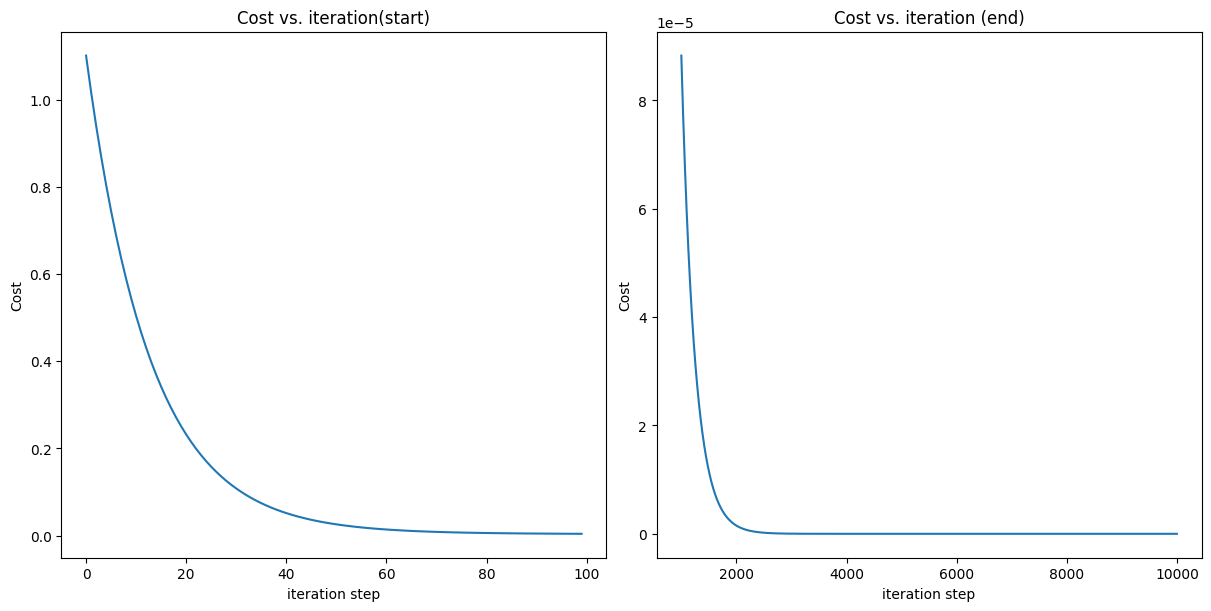

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize= (12, 6))

ax1.plot(J_hist[:100])
ax2.plot(1000+ np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predict x and test

In [36]:
def predict_x(x): 
     return round(w_final*x + b_final, 2)

In [37]:
x = 7.0

In [38]:
if  round(w_org * x + b_org, 2) == predict_x(x):
    print(True)

True


In [39]:
w_org

np.float64(6.769397422917578e-05)

In [40]:
b_org

np.float64(0.0009710848794263159)

In [41]:
w_final

np.float64(6.769448349350858e-05)

In [42]:
b_final

np.float64(0.0009710845973302461)